In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import control as ctrl

In [1]:
#parametros
m = 0.05  # masa
c = 0.0049 #capacitancia
R  = 10 #resietancia
L = 0.050 #inductancia
u = 10 #netrada del sistema
g = 9.81  # gravedad

y0 = [0.05, 0, 0]
ts= np.linspace(0, 15, 1000)

NameError: name 'np' is not defined

In [4]:
#definimos nuestra funcion del sistema 

def sys(y,ts,m,g,c,R,L,u):
    x1,x2,x3=y
    
    dxdt=[x2,
          g-(c/m)*(x3**2/x1),
          -(R/L)*x3+u/L
    ]
    return dxdt

In [5]:
#definimos una funcion para resolver el systema 

def sol(y0,ts,m,g,c,R,L,u):
    sol=odeint(sys,y0,ts,args=(m,g,c,R,L,u))
    
    x1 = sol[:, 0]
    x2 = sol[:, 1]
    x3 = sol[:, 2]
    
    xpp = g - (c/m)*(x3**2/x1) #velocidad del objeto
    
    h = ts[1] - ts[0] # de acuerdo con el teorema de la derivada necesitamos un cambio o paso "h" que va a ser este 
    
    xpp_num = np.diff(np.diff(x1)/h)/h
    
    return sol, xpp, xpp_num 

In [6]:
#para obtener eigenvalues a partir de los puntos de equilibrio 
x1=((u**2/R**2)*(c/(m*g)))
x2=0
x3=u/R
A = np.array([[0, 1, 0],
             [((c/m)*(x3**2/x1**2)), 0, ((-2*c/m)*(x3/x1))],
             [0, 0, -R/L]])

B = np.array([[0],
              [0],
              [u/L]])

C = np.array([x1, 0, 0])


eig=np.linalg.eigvals(A)
print(eig)


[  31.33689551  -31.33689551 -200.        ]


<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-5.684e-14 s^2 - 4.889e-12 s - 39.2
-----------------------------------
 s^3 + 200 s^2 - 982 s - 1.964e+05

[-200.        +0.j   31.33689551+0.j  -31.33689551+0.j]


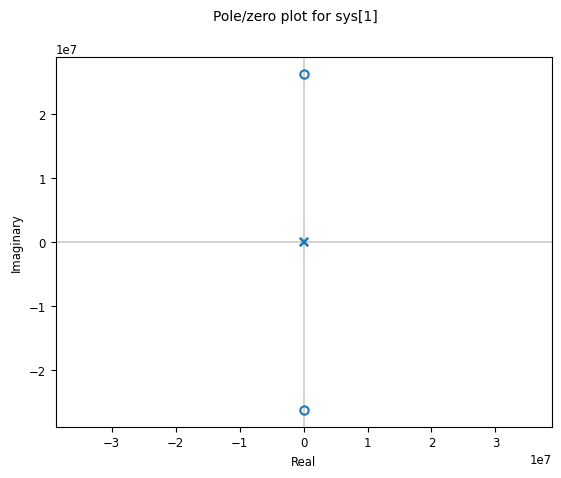

In [7]:
#obtenemos la funcion de transferencia
#debemos pasar el sistema tipo SS a TF, usanto ctrl 
sysSS=ctrl.ss(A,B,C,0)

sysTF=ctrl.ss2tf(sysSS)
print(sysTF)

#obtenemos el mapa de polos y zeros 
print(ctrl.poles(sysTF))
ctrl.pzmap(sysTF)

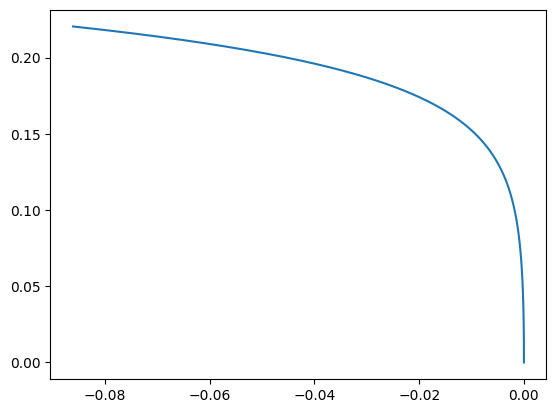

In [8]:
ysr, t = ctrl.step_response(sysTF)
plt.plot(t,ysr)

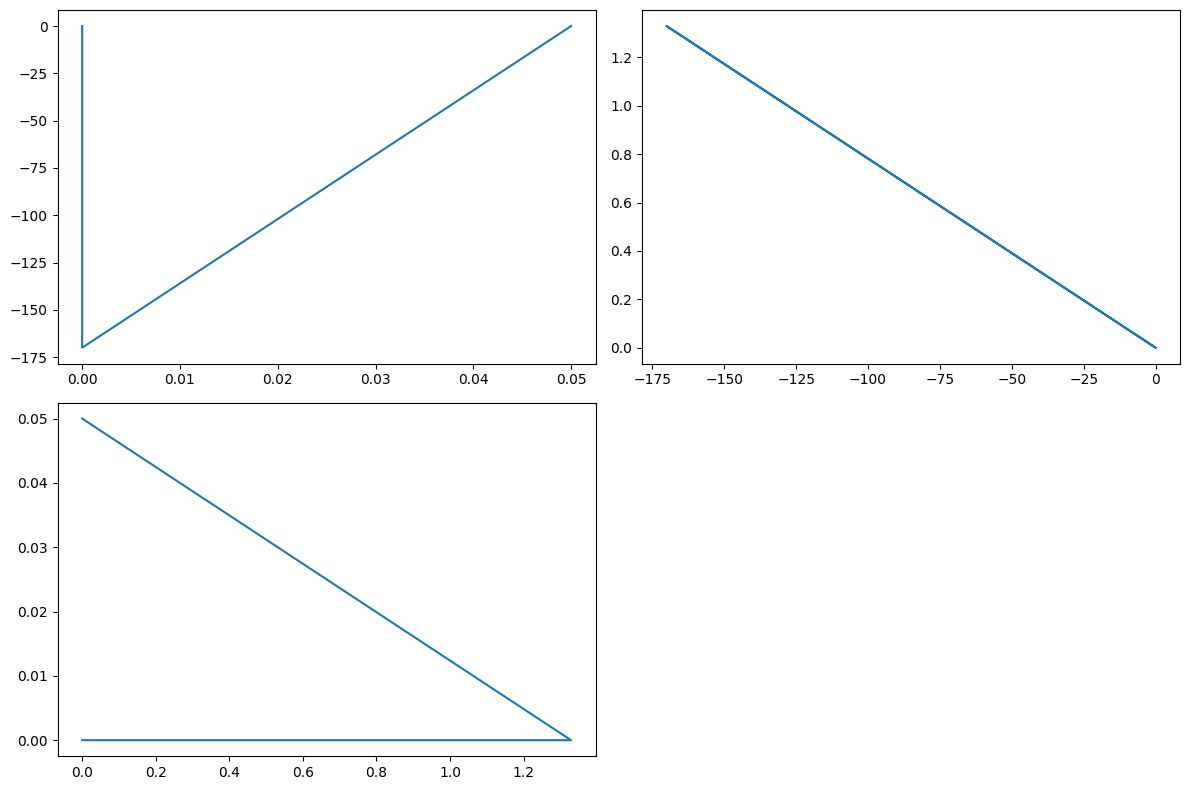

In [23]:
#retratos fase 

# Obtener las soluciones para x1, x2, x3
x1 = sol[:, 0]
x2 = sol[:, 1]
x3 = sol[:, 2]

# Graficar los retratos de fase
plt.figure(figsize=(12, 8))

# Retrato de fase x1 vs x2
plt.subplot(2, 2, 1)
plt.plot(x1, x2)


# Retrato de fase x2 vs x3
plt.subplot(2, 2, 2)
plt.plot(x2, x3)

# Retrato de fase x3 vs x1
plt.subplot(2, 2, 3)
plt.plot(x3, x1)


plt.tight_layout()
plt.show()

